In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sys import argv
from matplotlib import cm
import csv
import re


def Loading_CSV(filename, Headers = 0):
    q=0
    file = open(filename)
    csvreader = csv.reader(file)
    for i in range(Headers):
        header = next(csvreader)
    rows = []
    stats = []
    for row in csvreader:
            if q < 1:
                for value in row:
                    try:
                        rows.append(float(value))
                    except:
                        continue
            q=q+1
    #print(rows[0])
    file.close()
    return rows

def Plot_lags(Min_lag = 0, Max_lag = 29, lag_step = 1, x_figs = 5 ,y_figs = 2, file_first = "Results_9/pix1830CP41B/Spatial_SOCF_",
              file_final = "correlations1830.csv", figname = " "):
    
    # Define variables
    iterator= Min_lag - lag_step
    fig, ax = plt.subplots(x_figs,y_figs)
    Max_corr = -float('inf')
    Min_corr = float('inf')
    
    # Create the plots
    Pixels = []
    x = []
    while True:
        iterator = iterator + lag_step
        if iterator > Max_lag:
            break
        Pixels.append(Loading_CSV(file_first + str(iterator) + file_final))
        x.append(iterator)
    axs = ax.flat
    try:
        for i in range(0,len(Pixels),1):
            rows = []
            for j in range(len(Pixels)):
                rows.append(Pixels[j][i])
            axs[i].scatter(x, rows)
            axs[i].plot(x, rows)
            axs[i].set_title("pixel " + str(i) ,fontsize=40)
            axs[i].tick_params(axis='both', which='major', labelsize=20)
    except:
        None
    # Plot and save the heat maps
    plt.rcParams["figure.figsize"] = (36,30)
    plt.savefig(figname+ ".png")
    plt.show()

# Lagged Cross correlation

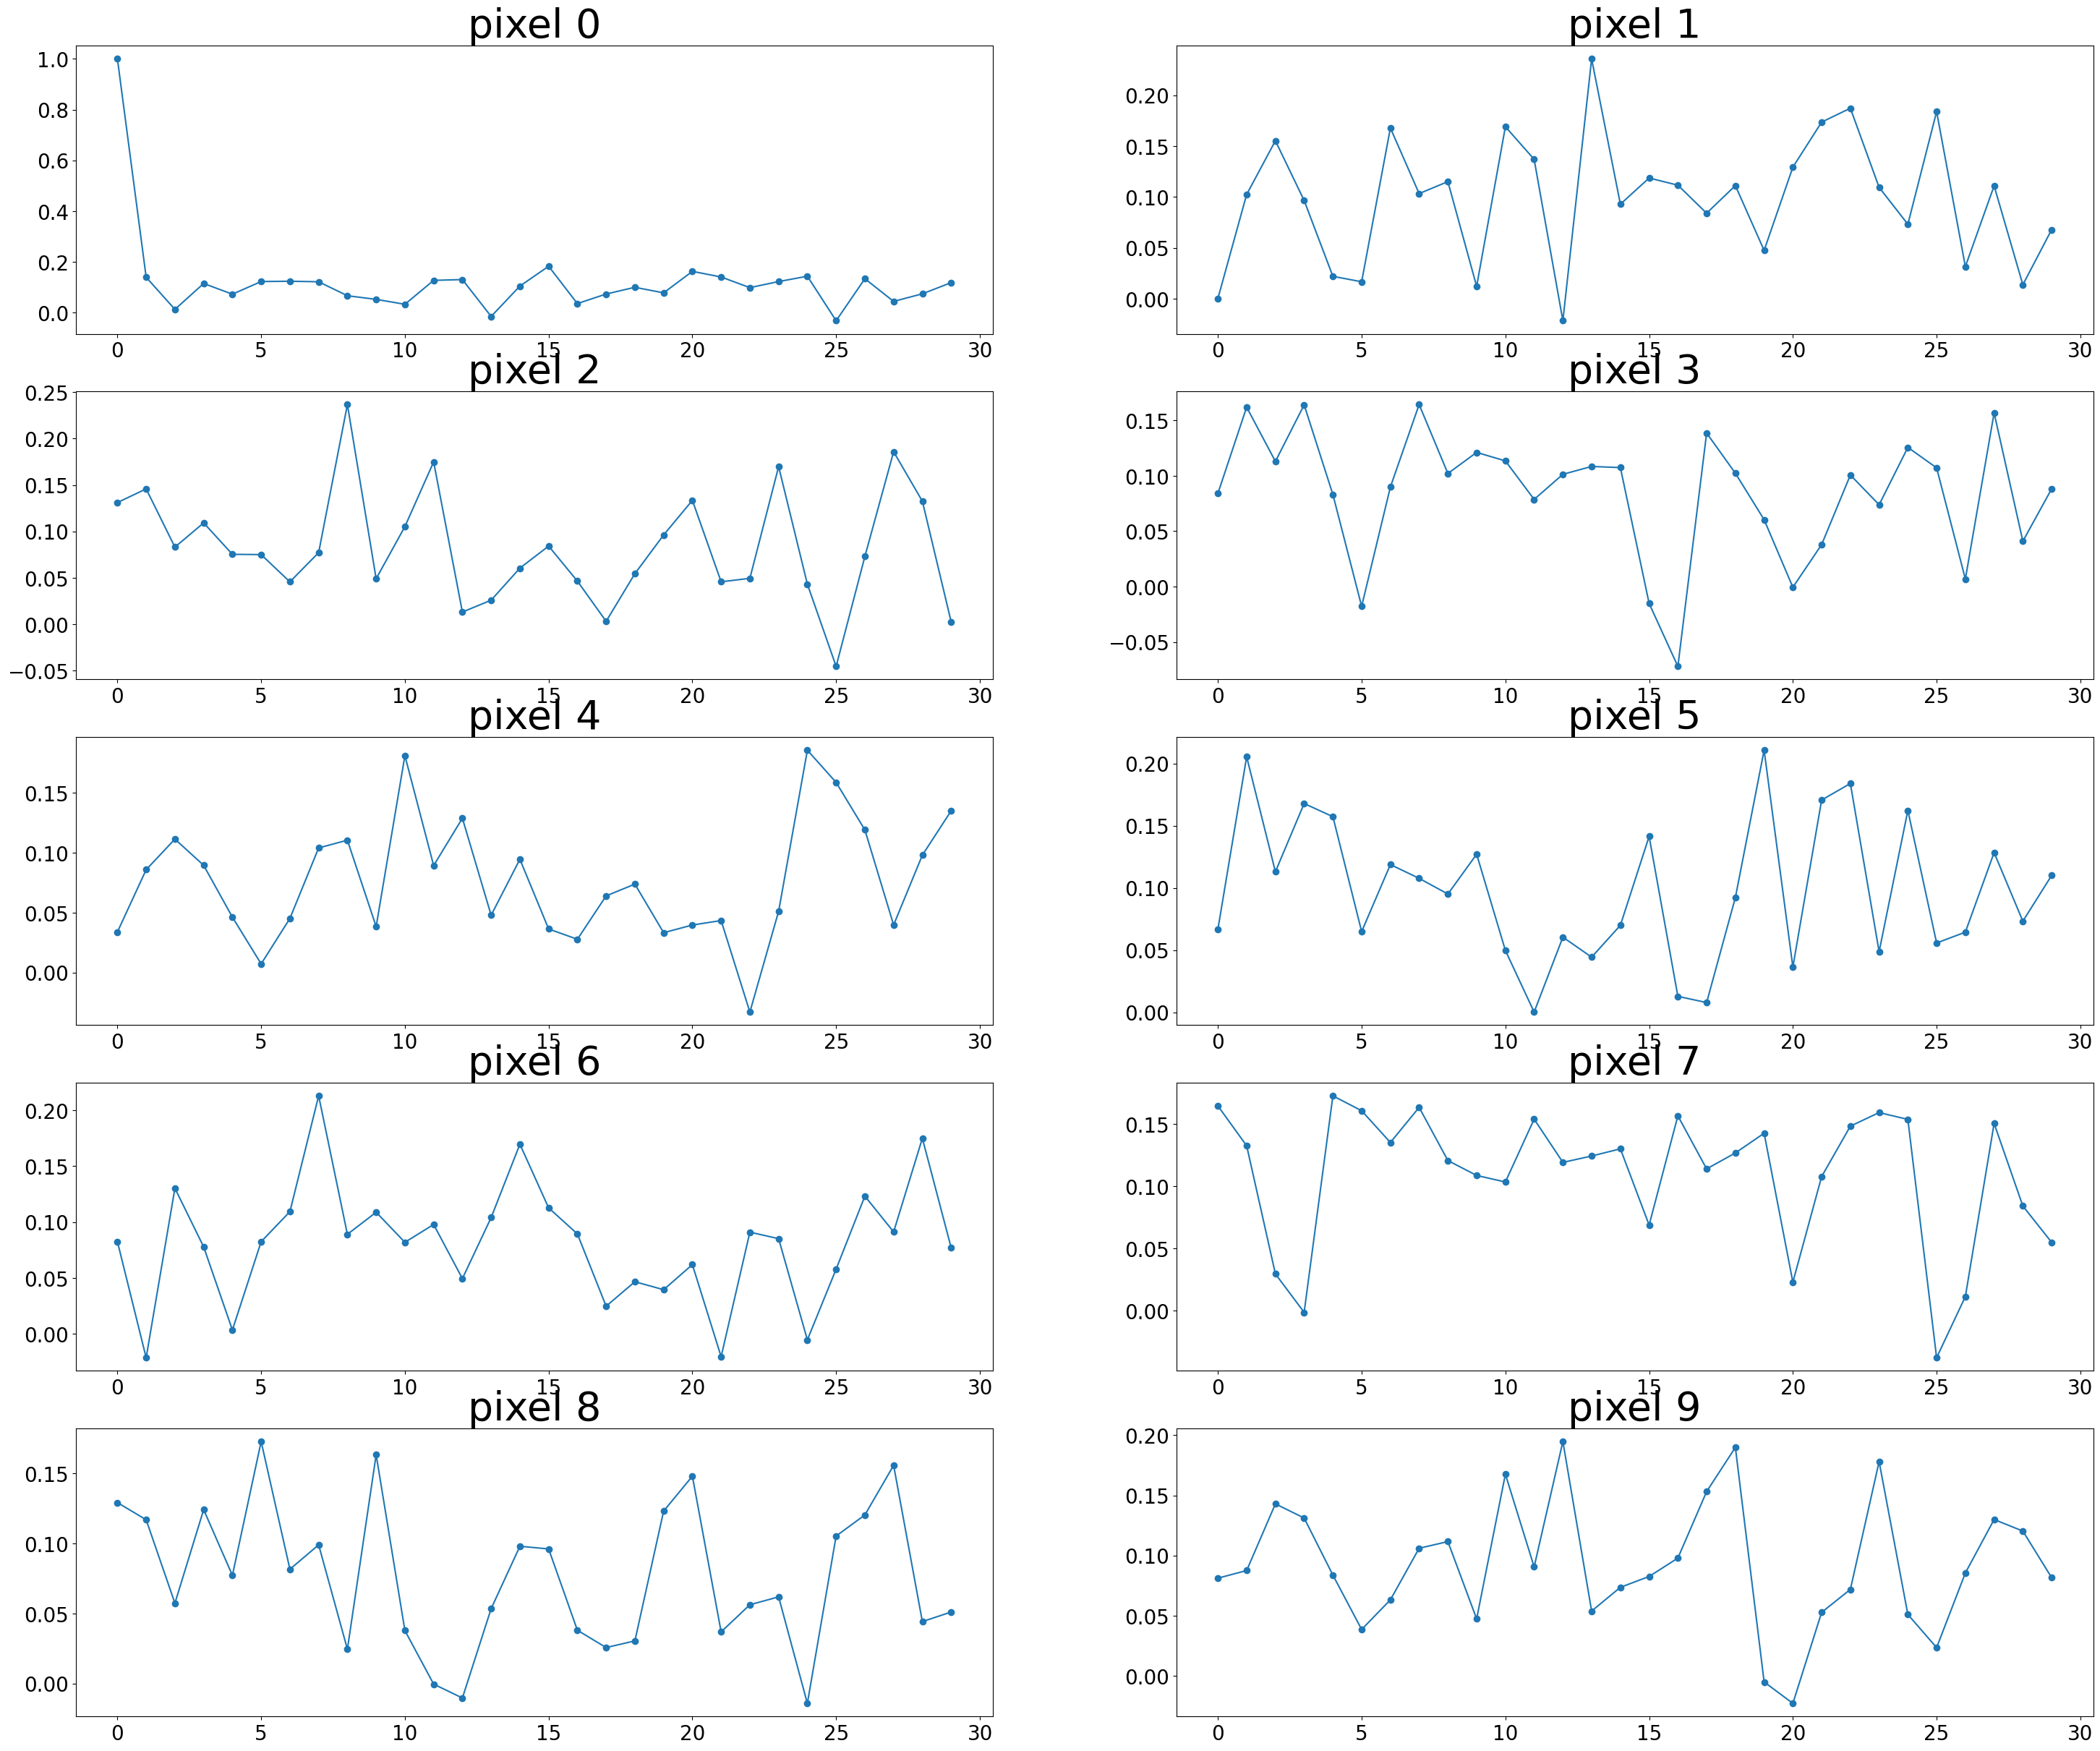

In [52]:
LED = "CP41B LED"
fig_type = "CCF"

Plot_lags(file_first = "Results_11/Lagged/pix1830CP41B/ACF40ACFcorrelations1830lagged",file_final = ".csv", figname=LED+fig_type)

In [54]:
LED = "CP41B TLHG"
fig_type = "CCF"

Plot_lags(file_first = "Results_11/Lagged/pix1830TLHG/ACF40ACFcorrelations1830lagged",file_final = ".csv", figname=LED+fig_type)

# Lagged Mutual Information

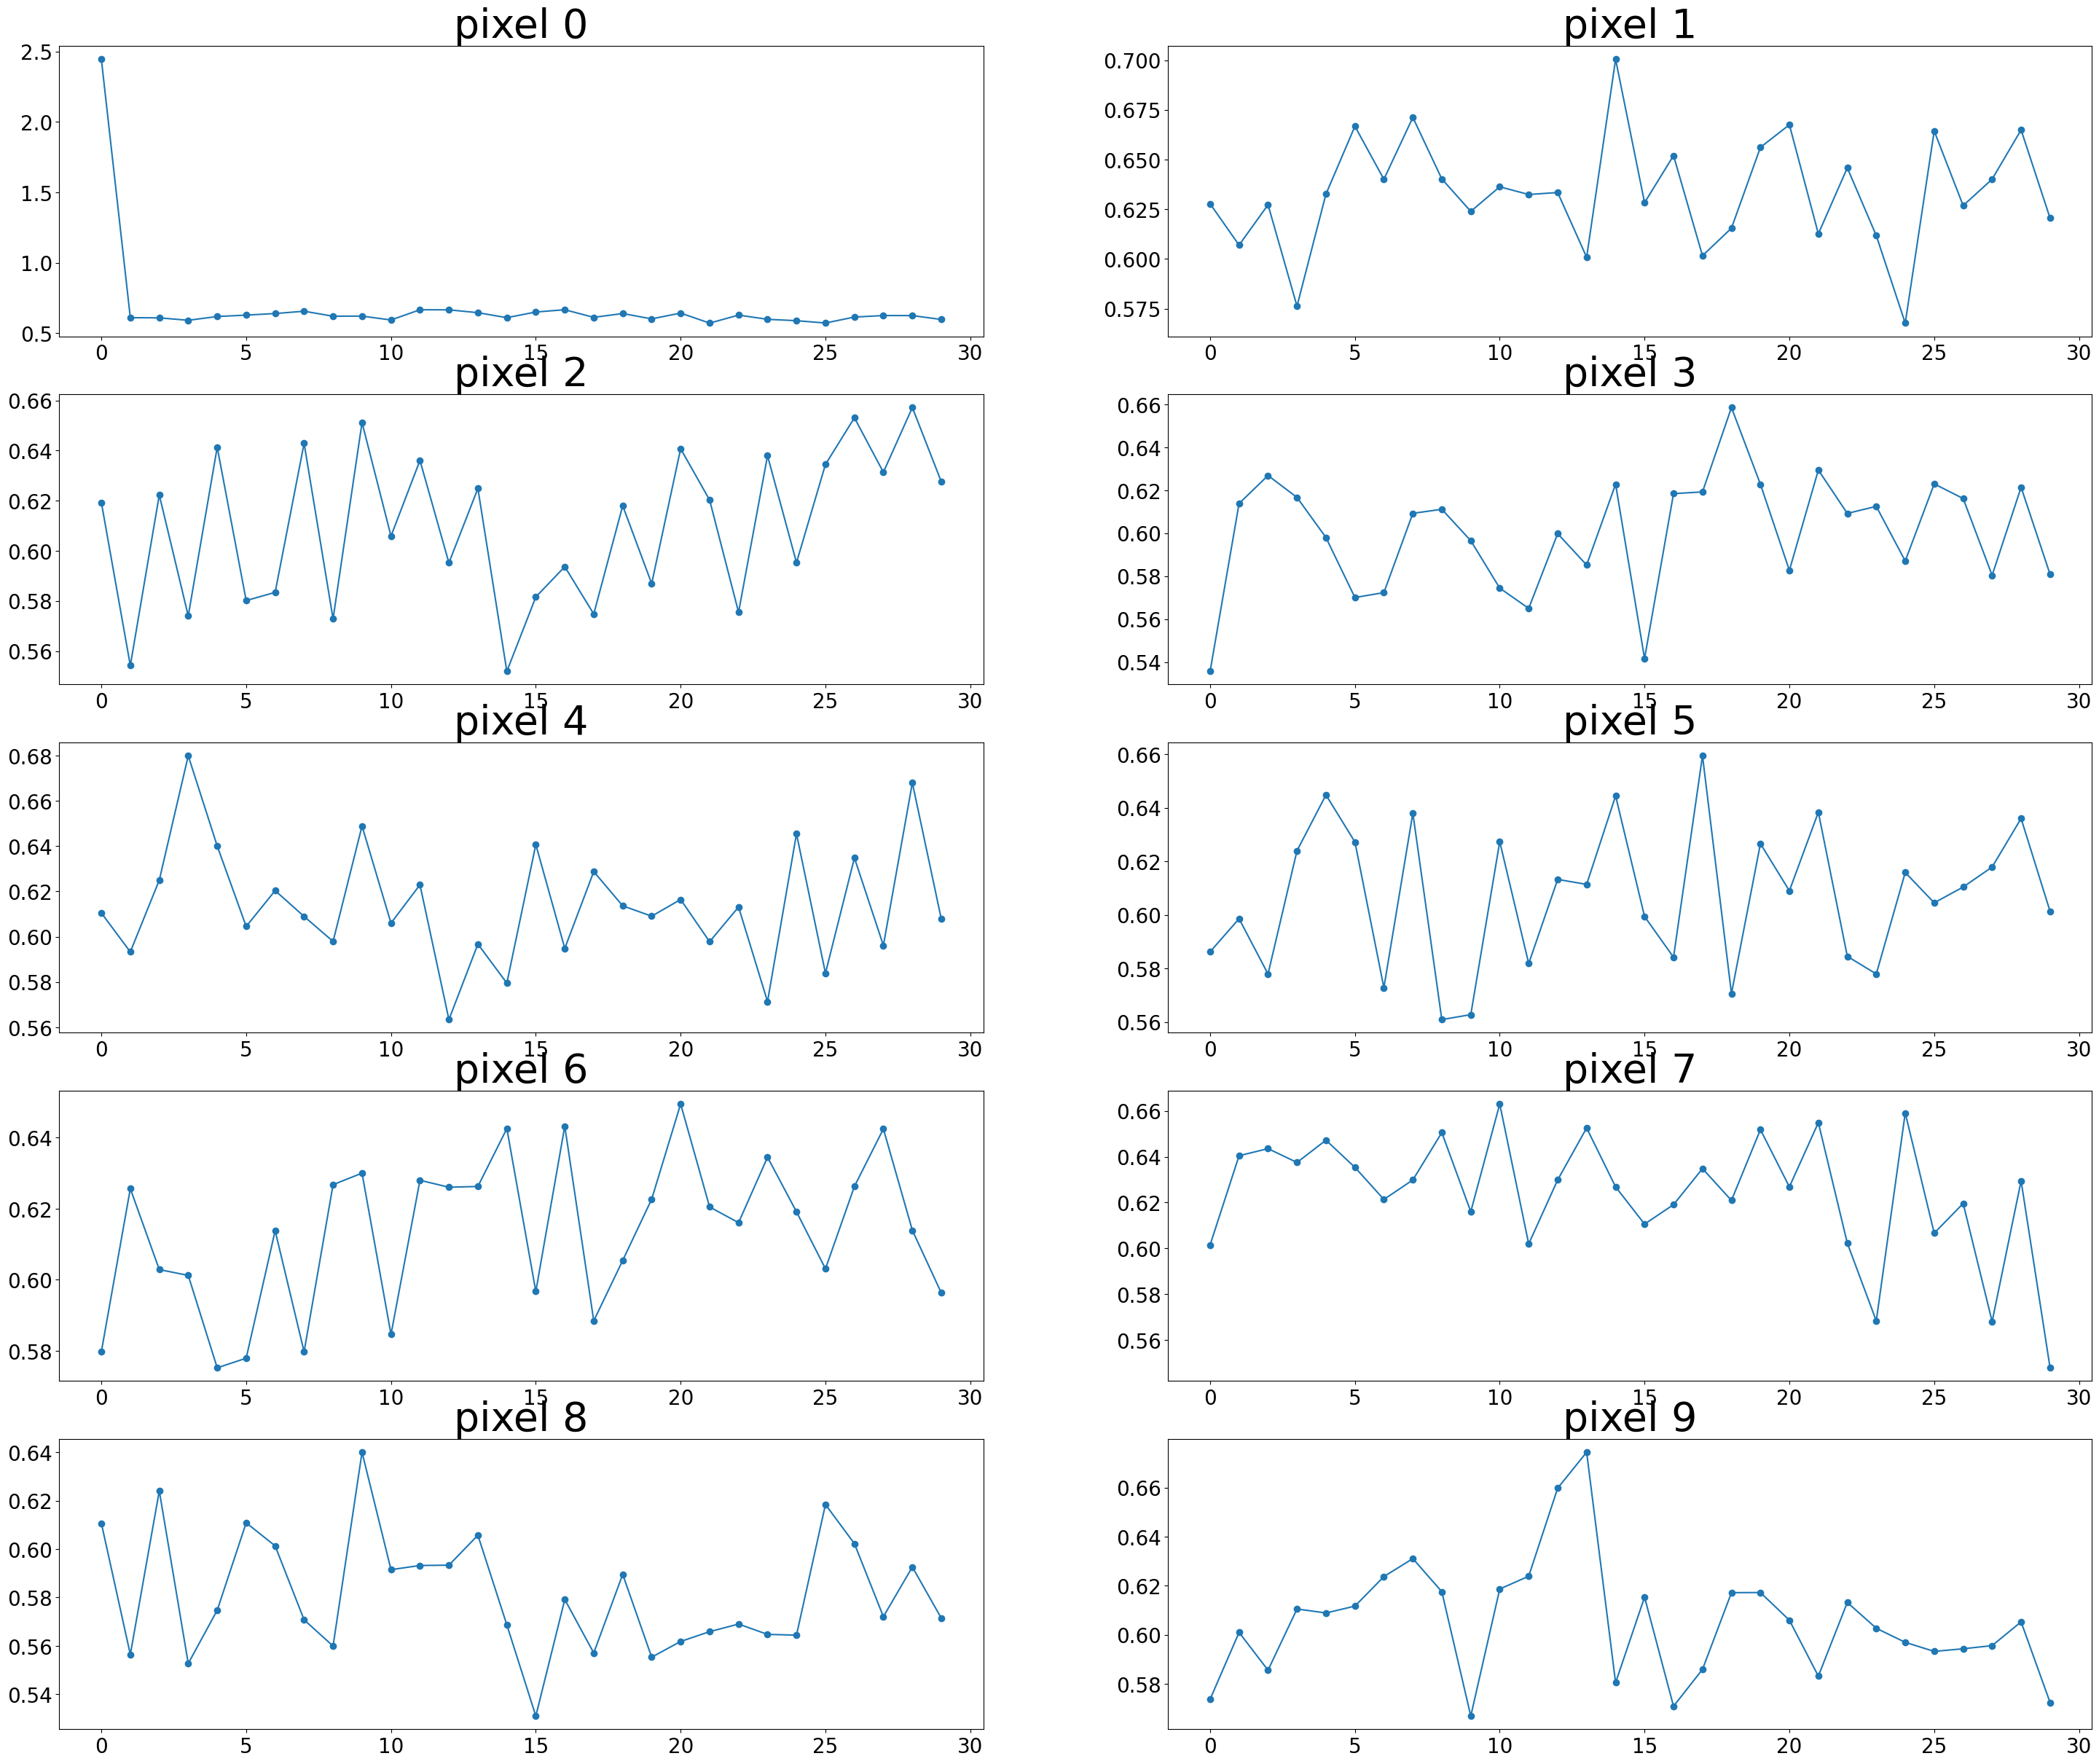

In [53]:
LED = "CP41B LED"
fig_type = "MI"

Plot_lags(file_first = "Results_11/Lagged/pix1830CP41B/MIF40MIFcorrelations1830lagged",file_final = ".csv", figname=LED+fig_type)

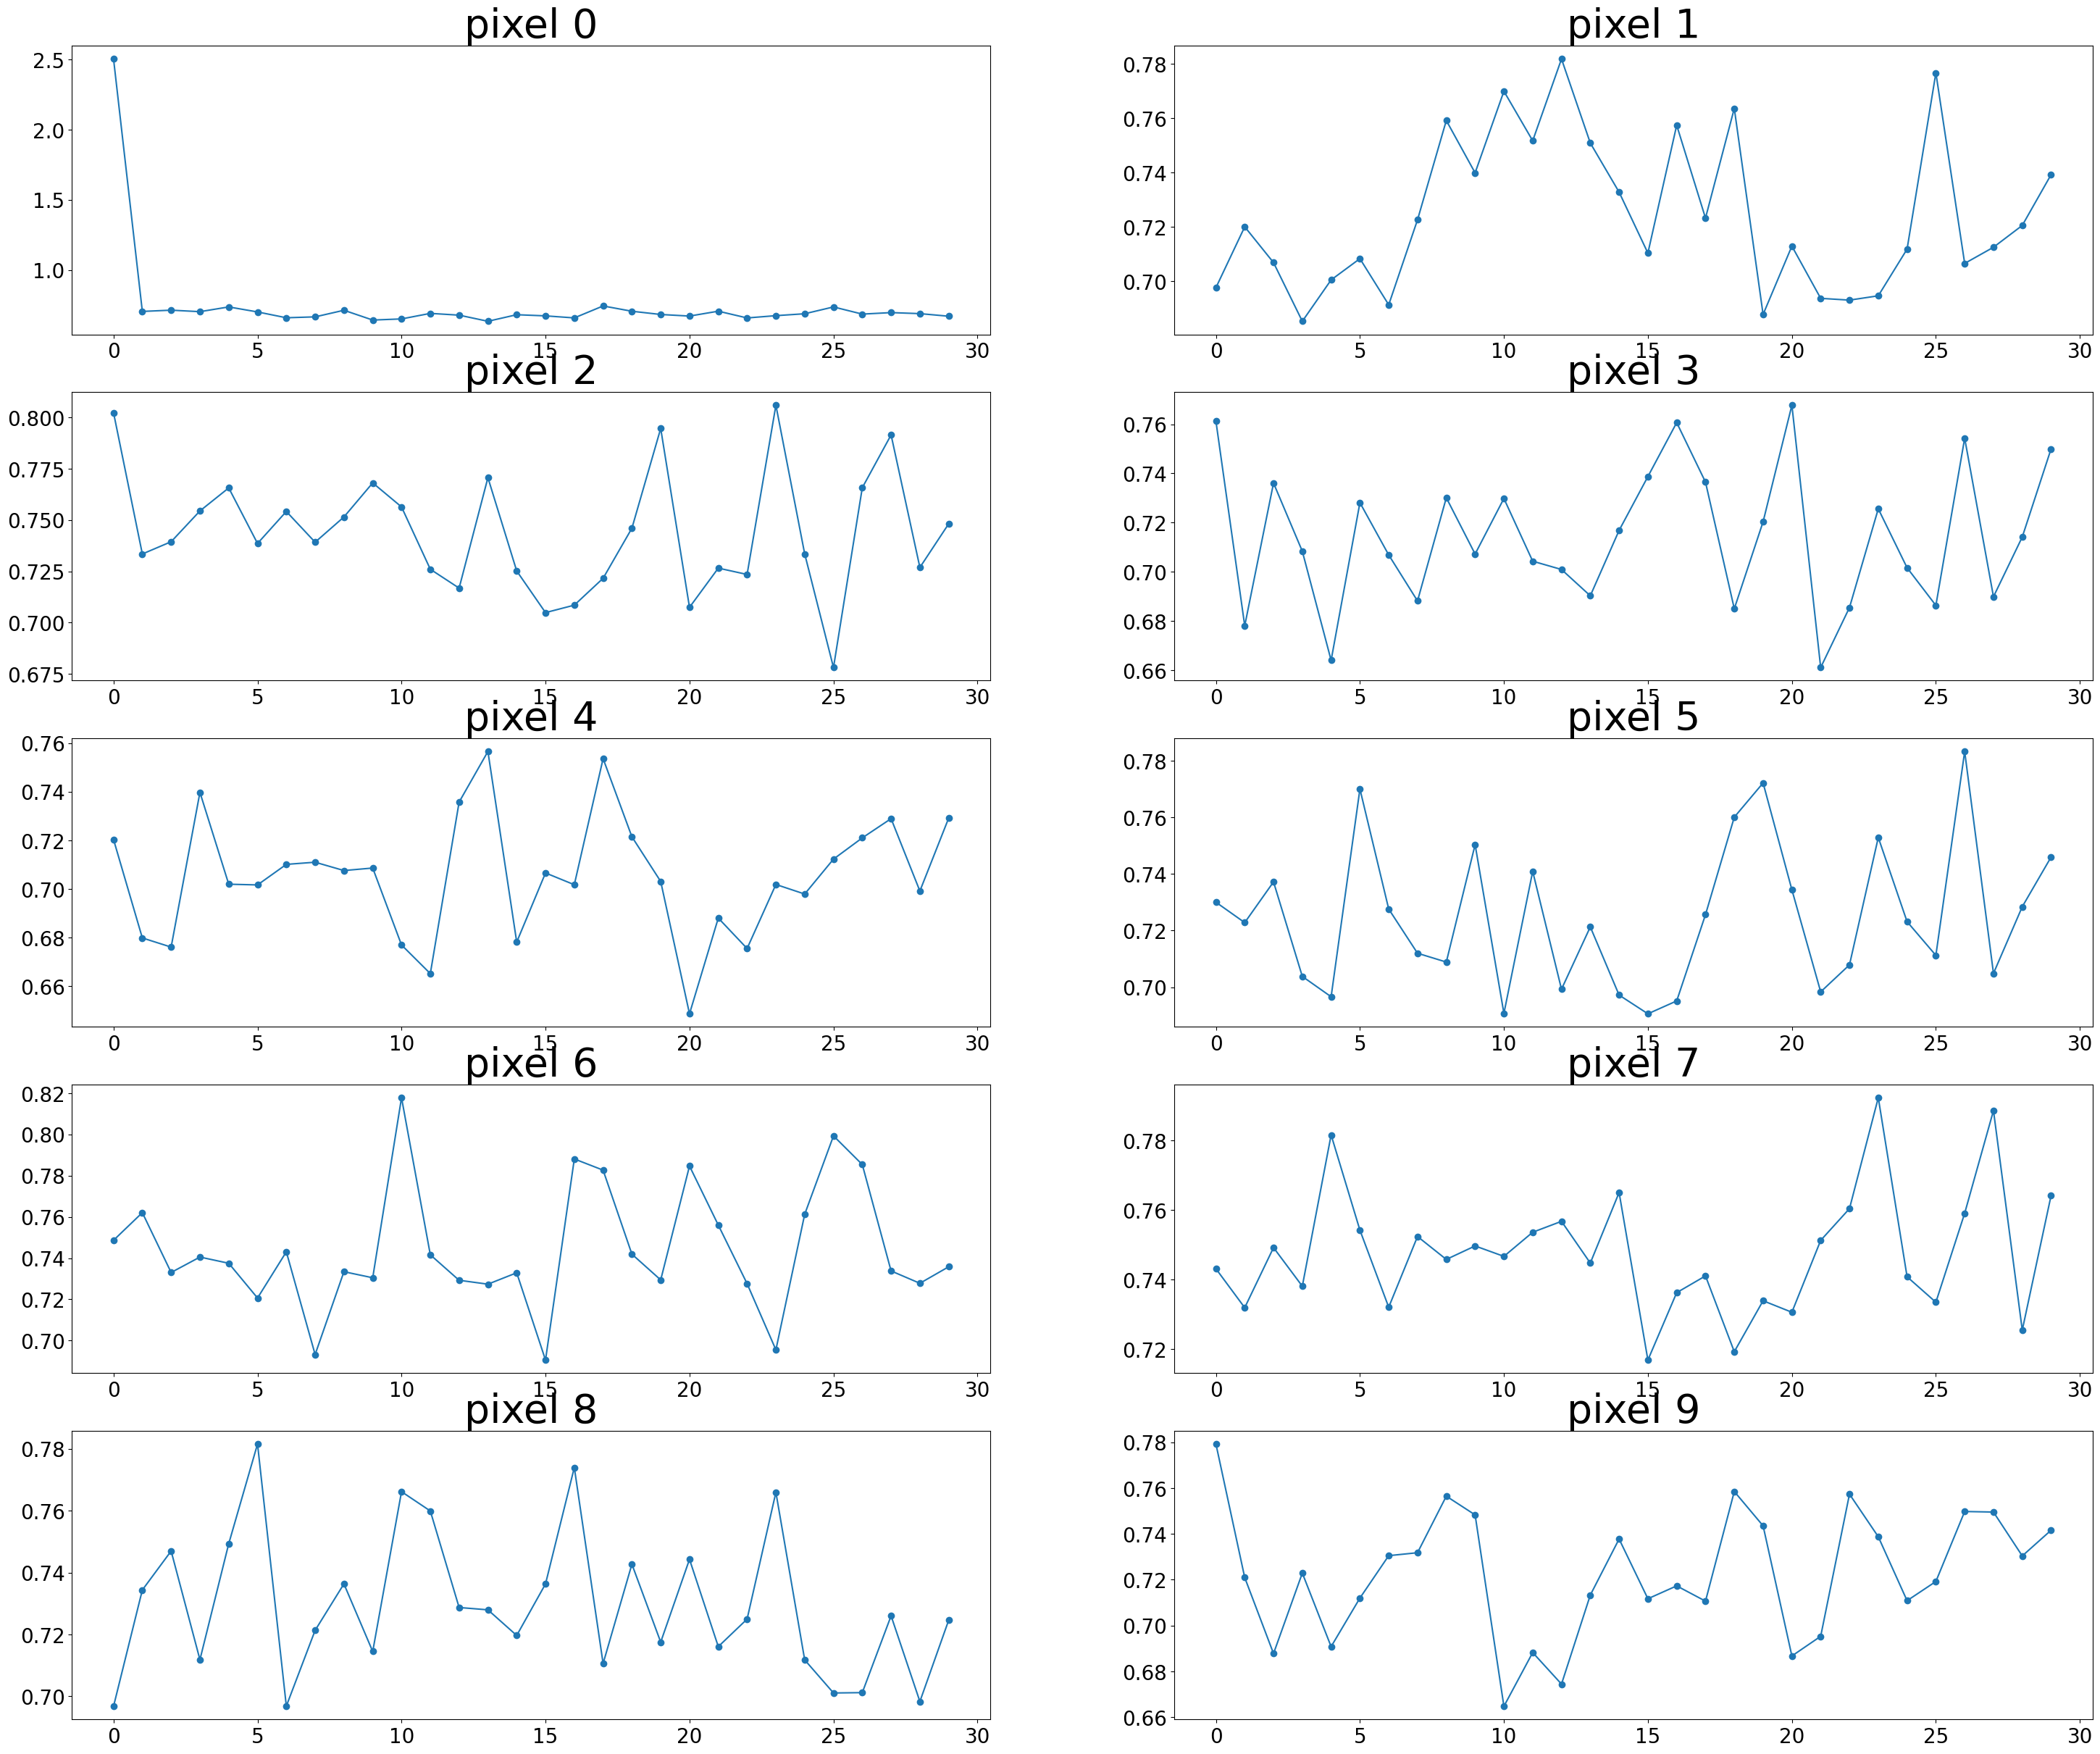

In [55]:
LED = "TLHG LED"
fig_type = "MI"

Plot_lags(file_first = "Results_11/Lagged/pix1830TLHG/MIF40MIFcorrelations1830lagged",file_final = ".csv", figname=LED+fig_type)